In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import arviz as az

# EXAMPLE: flatten

In [3]:
data = az.load_arviz_data('radon')
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

## EXAMPLE: don't flatten anything

array([<AxesSubplot:xlabel='y / y\nAITKIN'>,
       <AxesSubplot:xlabel='y / y\nBELTRAMI'>], dtype=object)

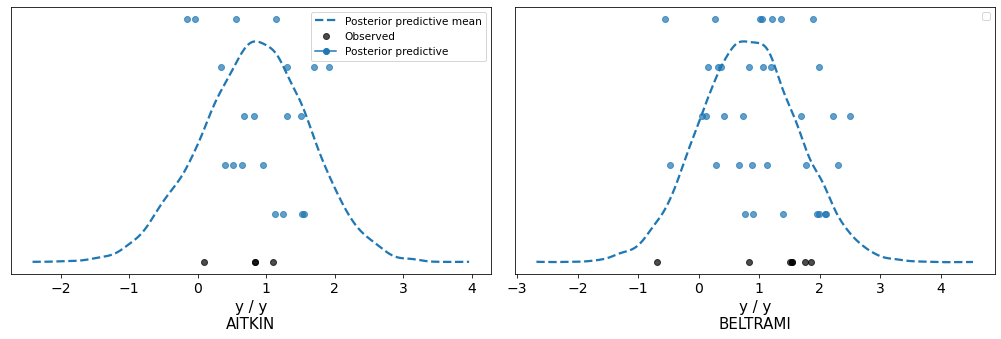

In [4]:
obs_county = data.posterior["County"][data.constant_data["county_idx"]]
data = data.assign_coords(obs_id=obs_county, groups="observed_vars")
az.plot_ppc(data, kind='scatter', flatten=[],
            coords={'obs_id': ['AITKIN', 'BELTRAMI']})

## EXAMPLE: flatten everything (default) 

<AxesSubplot:xlabel='y / y'>

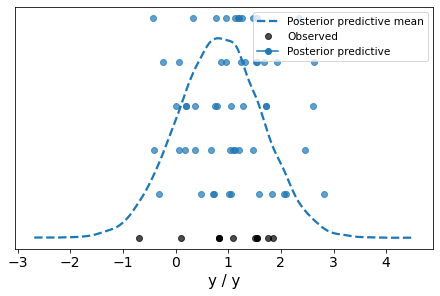

In [5]:
obs_county = data.posterior["County"][data.constant_data["county_idx"]]
data = data.assign_coords(obs_id=obs_county, groups="observed_vars")
az.plot_ppc(data, kind='scatter',
            coords={'obs_id': ['AITKIN', 'BELTRAMI']})

# TESTING

In [38]:
centered = az.load_arviz_data('centered_eight')
coords = {'school': ['Choate', 'Deerfield', 'Mt. Hermon']}
centered

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6000 and the array at index 1 has size 2000

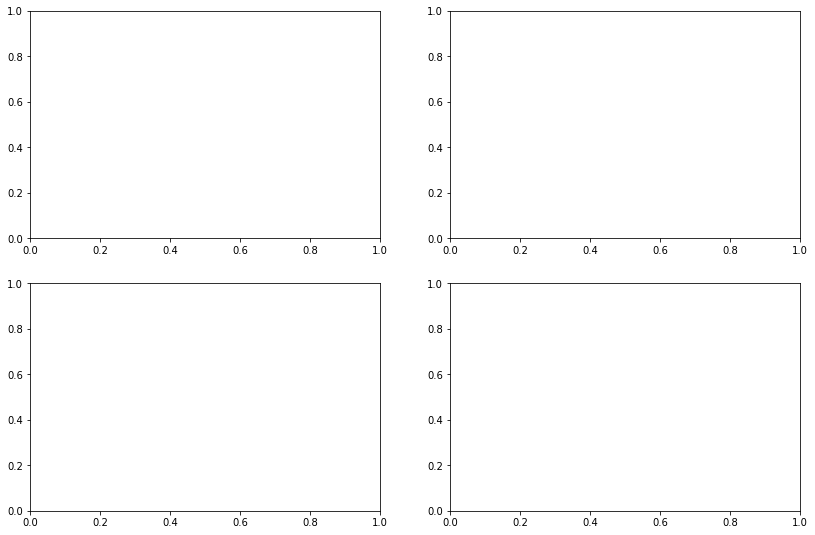

In [39]:
az.plot_pair(centered,
            var_names=['theta', 'mu', 'tau'],
            combine_dims=['school'],
            kind='kde',
            coords=coords,
            divergences=True,
            textsize=18)

array([[<AxesSubplot:ylabel='theta\nDeerfield'>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='mu'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='theta\nChoate', ylabel='tau'>,
        <AxesSubplot:xlabel='theta\nDeerfield'>,
        <AxesSubplot:xlabel='mu'>]], dtype=object)

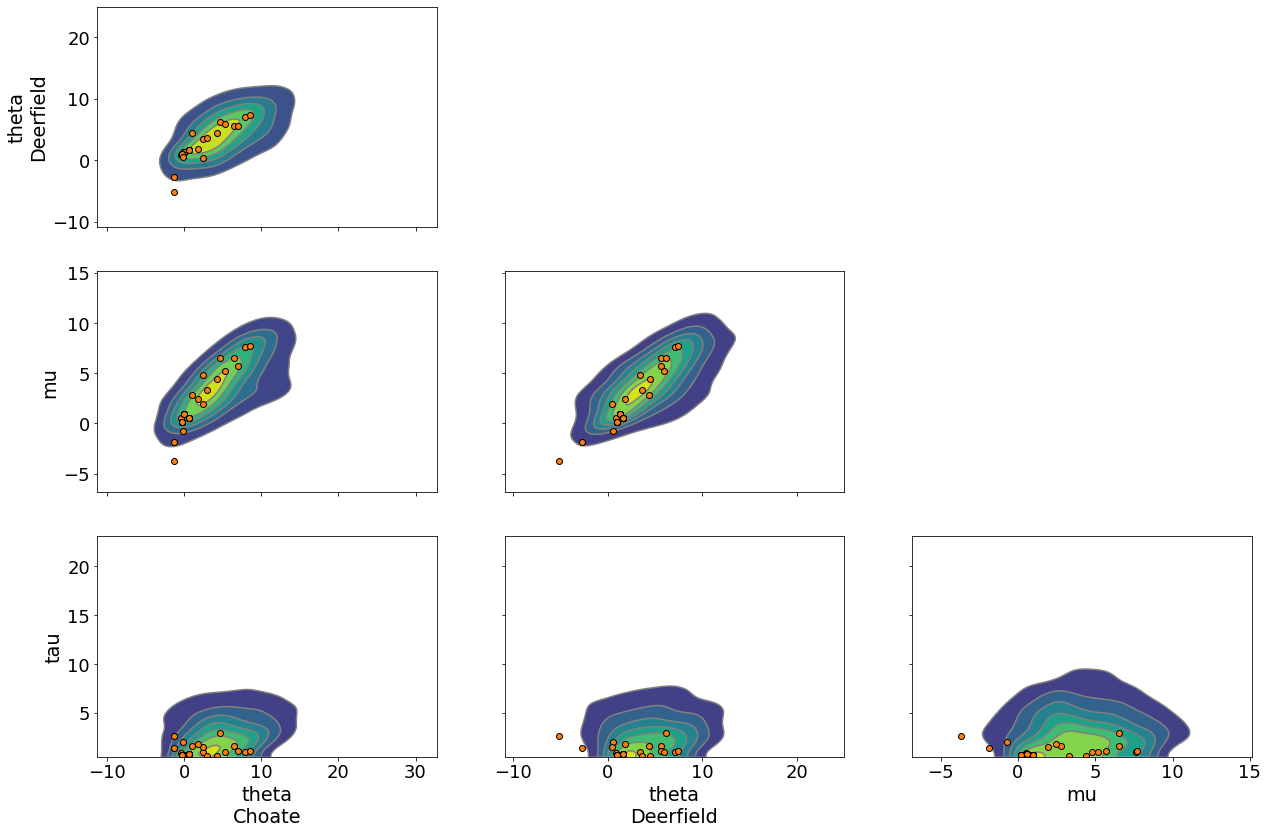

In [34]:
az.plot_pair(centered,
            var_names=['theta', 'mu', 'tau'],
            kind='kde',
            coords=coords,
            divergences=True,
            textsize=18)